<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew.

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [52]:
# ANSWER
titanic_csv = '../../DATA/titanic_train.csv'

In [53]:
df = pd.read_csv(titanic_csv, index_col= 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values.

In [54]:
# ANSWER
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [56]:
df.columns=df.columns.str.lower()

In [5]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
df.pclass.unique()

array([3, 1, 2], dtype=int64)

In [11]:
df.cabin.value_counts()

cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [7]:
df['cabin'] = df['cabin'].apply(lambda x: x[:1] if type(x) is str else x)

In [8]:
df['cabin'].value_counts()

cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [34]:
df[df['fare']==0] 

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.0,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.0,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,29.0,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.0,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [53]:
df[df['cabin'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [35]:
df.age.unique()

array([22.  , 38.  , 26.  , 35.  , 29.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [36]:
df[df['age']<=10]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S


In [41]:
df[df['age']<=10]['fare'].median()

27.0

In [39]:
df.groupby(['pclass'])['fare'].median()

pclass
1    60.2875
2    14.2500
3     8.0500
Name: fare, dtype: float64

In [13]:
df.groupby(['cabin'])['fare'].mean().sort_values(ascending=False)

cabin
B    113.505764
C    100.151341
D     57.244576
E     46.026694
A     39.623887
T     35.500000
F     18.696792
G     13.581250
Name: fare, dtype: float64

In [14]:
df.groupby(['cabin'])['fare'].median().sort_values(ascending=False)

cabin
C    83.47500
B    80.00000
D    53.10000
E    45.18125
A    35.50000
T    35.50000
G    13.58125
F    13.00000
Name: fare, dtype: float64

<Axes: xlabel='pclass'>

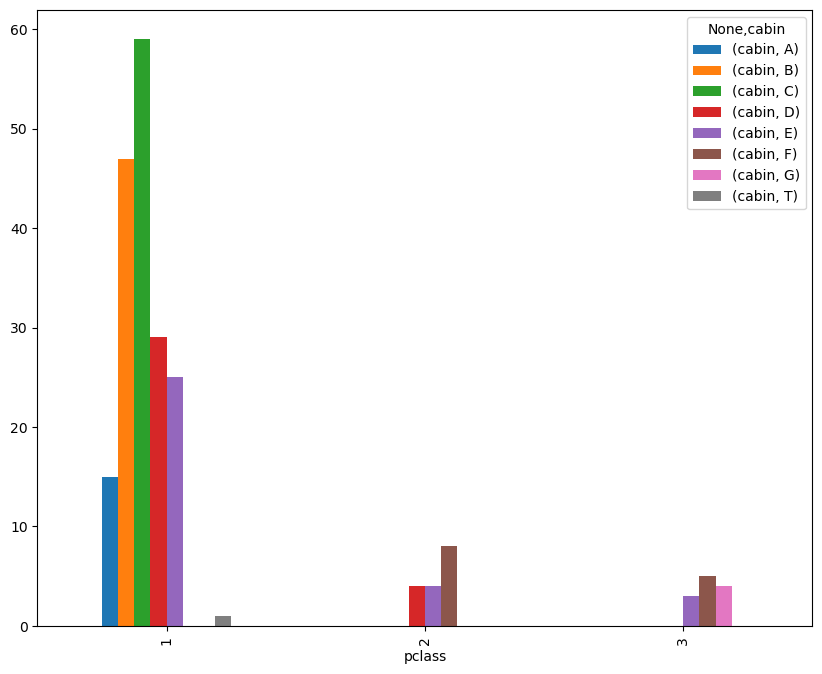

In [9]:
df.groupby(by=['pclass', 'cabin']).agg({'cabin': 'count'}).unstack().plot(kind='bar', figsize= (10,8))

In [16]:
#cabin_map = {'A':1
            #,'B':2
           # ,'C':3
            #,'D':4
            #,'E':5
            #,'F':6
            #,'G':7
            #,'F':8}
#df['cabin'] = df['cabin'].map(cabin_map)

In [16]:
#df.groupby(['cabin'])['fare'].max().sort_values(ascending=False)

In [57]:
#cabin_group = []
#def cabin_group(x):
    #if x > 263.0000:
        #cabin_group = '2.0'
    #elif x < 263.0000 and x >= 134.5000:
        #cabin_group = '3.0'
   # elif x < 134.5000 and x >= 113.2750:
        #cabin_group = '5.0'
    #elif x < 113.2750 and x >= 81.8583:
       # cabin_group = '4.0'
    #elif x < 81.8583 and x  >= 39.0000:
        #cabin_group = '1.0'
    #elif x < 39.0000 and x  >= 16.7000:
        #cabin_group = '8.0'
    #else:
       # cabin_group = '7.0'
    #return cabin_group

In [62]:
#df['cabin_group'] = df.fare.apply(cabin_group)

In [17]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#df['cabin'].fillna(df.groupby(['pclass'])['cabin'].transform('mean'), inplace = True)

In [20]:
#df['cabin']= np.round(df['cabin'], decimals = 0) 

In [18]:
#df['cabin'].value_counts()

In [23]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E,S


In [36]:
df=df.drop_duplicates()

In [40]:
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [15]:
df.fare.value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [16]:
df[df['fare']==8.0500]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,NaN,S
38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.05,NaN,S
46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.05,NaN,S
78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.05,NaN,S
88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.05,NaN,S
90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.05,NaN,S
91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.05,NaN,S
96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.05,NaN,S


In [12]:
df[df['cabin']=='E']

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,E,S
38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,E,S
46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,E,S
...,...,...,...,...,...,...,...,...,...,...,...
815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,E,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E,S
836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E,C


In [10]:
df.loc[df['fare']==8.0500,'cabin']='E'

In [11]:
df[df['fare']==8.0500]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,E,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,E,S
38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.05,E,S
46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.05,E,S
78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.05,E,S
88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.05,E,S
90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.05,E,S
91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.05,E,S
96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.05,E,S


In [14]:
df[(df['cabin']=='E')&(df['pclass']==1)]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E,S
167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E,S
263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E,S
310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E,C
320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E,C
338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E,C
357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E,S
371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E,C


In [18]:
df.loc[df['fare']==13.0000, 'cabin']='D'

In [19]:
df[df['fare']==13.0000]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,D,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D,S
124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0,D,S
135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0,D,S
150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0,D,S
179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0,D,S
191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0,D,S
192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,D,S
200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0,D,S


In [22]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       607
embarked      2
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     284 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [35]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
df.embarked.value_counts().sum()

889

In [45]:
df[df['embarked']=='nan']

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,


In [31]:
def bar_chart(train, feature):
    survived = train[train['survived']==1][feature].value_counts(normalize=True)*100
    dead = train[train['survived']==0][feature].value_counts(normalize=True)*100
    df= pd.DataFrame([survived,dead])
    df.index = ['survived','Non_survived']
    df.plot(kind ='bar',stacked = True, figsize=(10,5) )

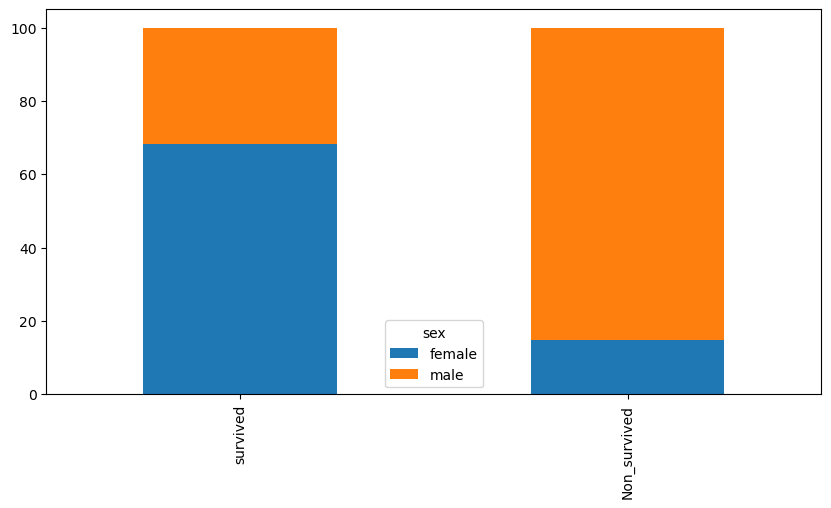

In [32]:
bar_chart(df,'sex')

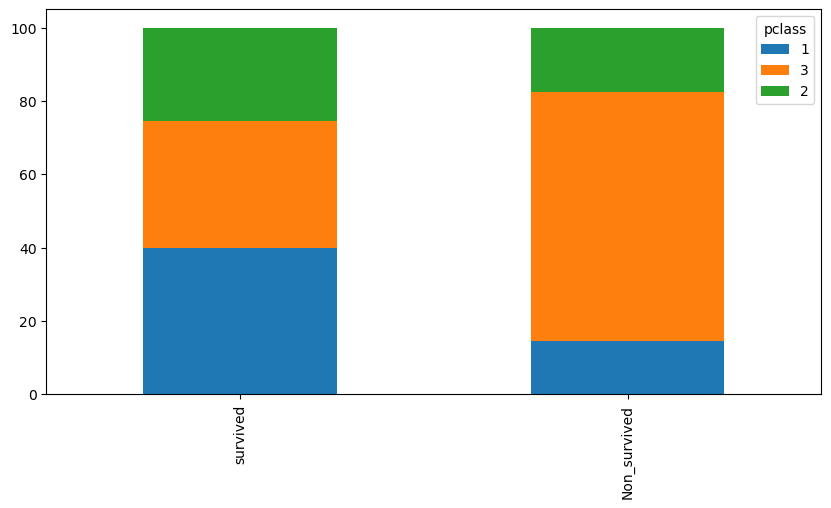

In [33]:
bar_chart(df, 'pclass')

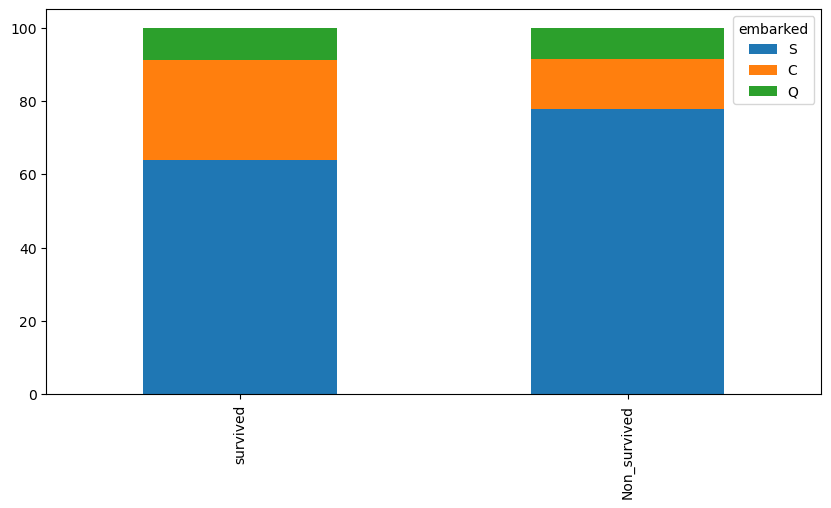

In [41]:
bar_chart(df, 'embarked')

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [28]:
X=df[['pclass','parch']]
y= df['survived']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 1) 

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [ ]:
# ANSWER

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [31]:
# ANSWER
# Create Model
logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [32]:
# ANSWER
# Fit Model
logreg.fit(X_train,y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [33]:
# ANSWER
logreg.coef_

array([[-0.90824213,  0.33432156]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [34]:
# ANSWER
logreg.intercept_

array([1.40820621])

We can create tuples of the predictor names and coefficients like this:

In [35]:
# ANSWER
print(set(zip(X, logreg.coef_[0])))

{('pclass', -0.9082421341469834), ('parch', 0.33432155514777906)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [36]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

pclass      -0.908242
parch       +0.334322


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [37]:
# ANSWER
logreg.score(X_train,y_train)

0.6924157303370787

What is the  `accuracy_score` for the test data?

In [38]:
logreg.score(X_test,y_test)

0.6536312849162011

In [ ]:
# ANSWER

What can we say about this result?

ANSWER
- ...the diferent between test score and train score is less than 5%,

- ...overfitting seems unlikely

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [66]:
# ANSWER
df['age'].fillna(df.groupby(by=['sex'])['age'].transform('mean'),inplace=True)

In [88]:
# Build Model
X=df[['pclass','parch','age']]
y= df['survived']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1) 

log=LogisticRegression()

# Fit Model
log.fit(X_train,y_train)
# Score
log.score(X_train,y_train)

0.7200598802395209

In [89]:
log.score(X_test,y_test)

0.6681614349775785

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- it shows that modle is over fitted 
- modle is complex
- ...feature is not independt of other features are already in

Let's see where the model is going wrong by showing the Confusion Matrix:

In [90]:
# ANSWER
y_pred_class = log.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

NameError: name 'metrics' is not defined

Nb. Here is how `confusion_matrix` arranges its output:

In [91]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [92]:
# this is what model created for X_test
y_pred_class

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [93]:
#this is actual value
#we have to see when error happen
y_test.values

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [94]:
# for classification problem we have different matrix we can use depend of class of interest such a TN,TP,FN,FP
print(classification_report(y_test,y_pred_class))
#for this case we can use recall witch says model acurracy is 45%  for TP 

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       128
           1       0.66      0.45      0.54        95

    accuracy                           0.67       223
   macro avg       0.67      0.64      0.64       223
weighted avg       0.67      0.67      0.65       223



Which type of error is more prevalent?

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

In [95]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = log.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

NameError: name 'metrics' is not defined

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [96]:
titanic_with_dummies = pd.get_dummies(data = df, columns = ['sex', 'embarked', 'pclass'],
                                      prefix = ['sex', 'embarked', 'pclass'] )
titanic_with_dummies.head()

,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True,False,False,True
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False,True,False,False
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True,False,False,True
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True,True,False,False
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True,False,False,True


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [97]:
titanic_with_dummies['Age'] = titanic_with_dummies[["age", "parch", "sex_male", "pclass_1", "pclass_2"]].groupby(["parch", "sex_male", "pclass_1", "pclass_2"])["age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [80]:
titanic_with_dummies.isnull().sum()

survived        0
name            0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin         687
sex_female      0
sex_male        0
embarked_C      0
embarked_Q      0
embarked_S      0
pclass_1        0
pclass_2        0
pclass_3        0
Age             0
dtype: int64

In [87]:
print(df.head())

             survived  pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          name     sex   age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             sibsp  parch            ticket     fare cabin embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [98]:
def logreg(data,feature_cols,torget_clomn):
    X =data[feature_cols]
    y =data[torget_clomn]
    
    X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)
    
    logreg=LogisticRegression()
    
    logreg.fit(X_train_y_train)
    
    logreg_score = logreg.score(X_test,y_test)
    
    logreg_perds = logreg.predict(X_test)
    
    logreg_pred_probs = logreg.predict_proba(X_test)[:1]
    
    return logreg_score, logreg_perds, logreg_pred_probs


In [100]:
# ANSWER
feature_cols = titanic_with_dummies[['pclass_1','pclass_2','pclass_3','sex_male','age']]
torget_clomn= titanic_with_dummies['survived']
logreg(titanic_with_dummies,feature_cols,torget_clomn)


ValueError: Boolean array expected for the condition, not float64

In [101]:
# ANSWER
X = titanic_with_dummies[['parch','sibsp','pclass_1','pclass_2','age']]
y = titanic_with_dummies['survived']
    
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)
    
logreg=LogisticRegression()
    
logreg.fit(X_train,y_train)
logreg.score(X_train,y_train)

0.7035928143712575

In [102]:
logreg.score(X_test,y_test)
  

0.6457399103139013

In [124]:
logreg.predict(X_test)

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [123]:
logreg.predict_proba(X_test)[:1]

array([[0.49651385, 0.50348615]])

Can we improve the model by including the remaining features?

In [ ]:
# ANSWER

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



